In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
df = pd.read_csv('./fifa_56rows.csv')

<ipython-input-196-6cec62d66366>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./fifa_56rows.csv')


In [197]:
df.head()

,Unnamed: 0,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
0,0,158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,...,95,75,96,24,11,93,64,19,2,1
1,1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,...,81,90,88,19,6,86,66,19,3,2
2,2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,...,76,88,95,24,11,86,59,20,3,1
3,3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,...,90,93,93,29,9,89,63,20,3,2
4,4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,...,94,83,89,53,13,89,80,21,3,3


In [198]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [199]:
df.set_index('sofifa_id',drop=True, inplace=True)

In [200]:
df.head()

,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_name,...,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,72,Paris Saint-Germain,...,95,75,96,24,11,93,64,19,2,1
188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,81,FC Bayern München,...,81,90,88,19,6,86,66,19,3,2
20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,83,Manchester United,...,76,88,95,24,11,86,59,20,3,1
190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,68,Paris Saint-Germain,...,90,93,93,29,9,89,63,20,3,2
192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,70,Manchester City,...,94,83,89,53,13,89,80,21,3,3


In [201]:
good_columns = df._get_numeric_data().drop(['nation_team_id'],axis=1)

In [202]:
from sklearn.preprocessing import StandardScaler

# Your code here:
df_scale=pd.DataFrame(StandardScaler().fit_transform(good_columns), columns=good_columns.columns)
df_scale.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_loaned_from,preferred_foot,...,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive
0,3.957766,3.600787,9.870564,15.967668,1.863600,-1.64518,-0.414683,-0.473866,-0.246999,-1.792488,...,3.008112,1.723447,3.134034,-1.055347,-0.308329,2.631021,0.731904,-0.150223,-0.450989,-2.15987
1,3.812472,3.436517,15.321406,13.400340,1.440533,0.54062,0.858940,-0.473866,-0.246999,0.557884,...,1.982187,2.675263,2.475974,-1.296325,-0.605351,2.134498,0.875271,-0.150223,1.431652,-0.18195
2,3.667179,3.272248,5.536158,13.400340,2.286666,0.83206,1.141967,-0.473866,-0.246999,0.557884,...,1.615785,2.548354,3.051777,-1.055347,-0.308329,2.134498,0.373487,-0.084296,1.431652,-2.15987
3,3.667179,3.272248,16.569190,13.400340,0.805934,-0.91658,-0.980738,-0.473866,-0.246999,0.557884,...,2.641710,2.865627,2.887262,-0.814369,-0.427138,2.347293,0.660221,-0.084296,1.431652,-0.18195
4,3.667179,3.272248,16.109480,17.508066,1.017467,-0.04226,-0.697711,-0.473866,-0.246999,0.557884,...,2.934832,2.231082,2.558232,0.342326,-0.189520,2.347293,1.878840,-0.018369,1.431652,1.79597


### Clustering with K-Means

In [203]:
from sklearn.cluster import KMeans

In [204]:
kmeans_model = KMeans(n_clusters=4, random_state=1)
#good_columns = df._get_numeric_data().drop(['nation_team_id'],axis=1)
kmeans_model.fit_predict(df_scale)

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [205]:
df['labels'] = kmeans_model.labels_

In [206]:
df['labels'].value_counts()

3    6620
0    5570
2    4851
1    2124
Name: labels, dtype: int64

### Clustering with DBSCAN

In [207]:
from sklearn.cluster import DBSCAN

In [208]:
dbscan_model = DBSCAN()
dbscan_model.fit_predict(df_scale)

array([-1, -1, -1, ..., -1, -1, -1])

In [209]:
df['labels_DBSCAN'] = dbscan_model.labels_

In [210]:
df['labels_DBSCAN'].value_counts()

-1    19165
Name: labels_DBSCAN, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

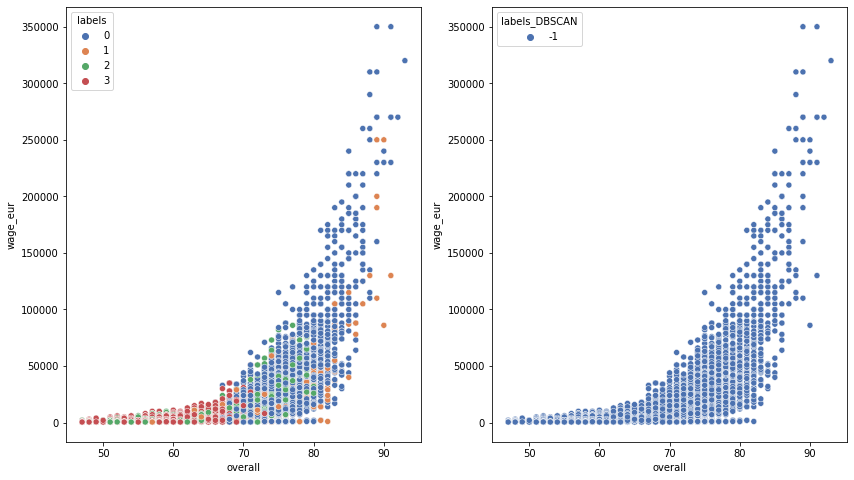

In [211]:
fig, axes = plt.subplots(1,2,figsize=(14,8))

sns.scatterplot(data=df, x='overall', y='wage_eur', hue='labels', ax=axes[0], palette='deep')
sns.scatterplot(data=df, x='overall', y='wage_eur', hue='labels_DBSCAN', ax=axes[1], palette='deep')

### Changing Number of Clusters in K-Means

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


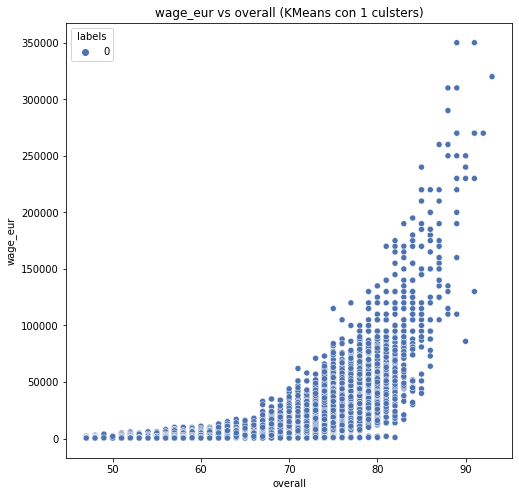

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


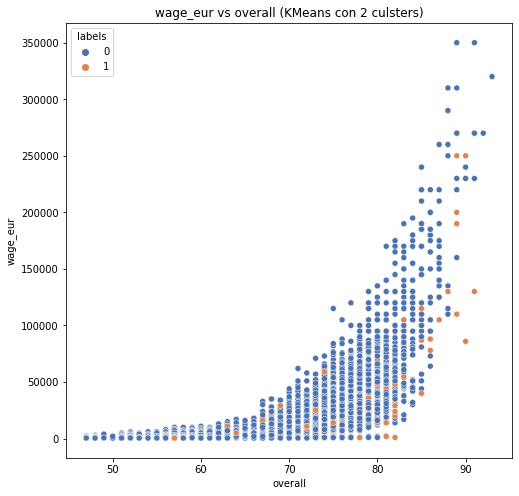

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


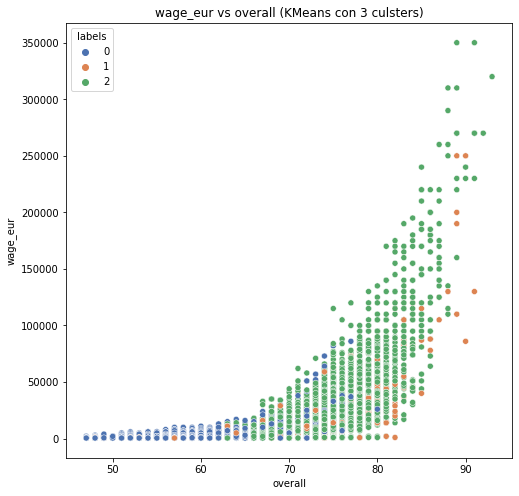

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


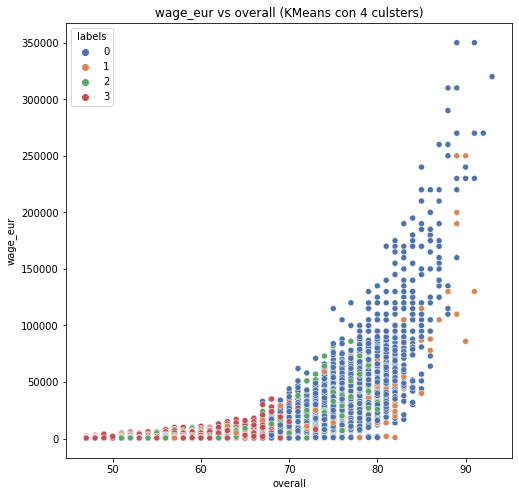

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


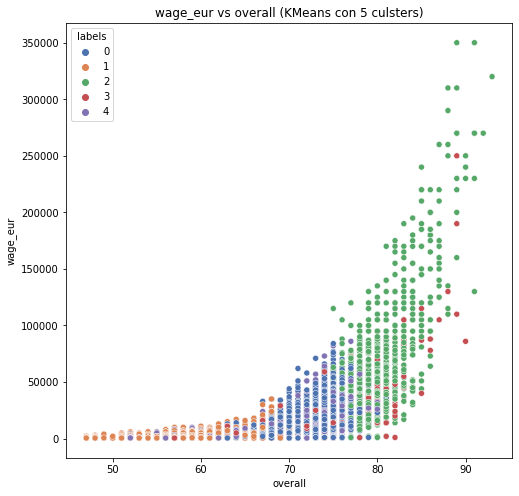

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


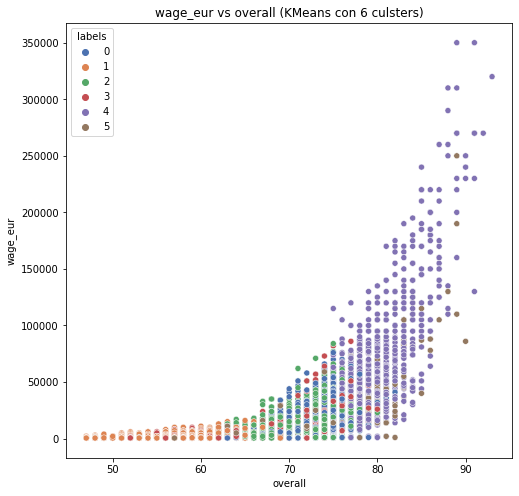

In [212]:
for i in range(6):
    kmeans_model=KMeans(n_clusters=i+1,random_state=1).fit_predict(df_scale)
    df['labels']=kmeans_model
    plt.figure(figsize=(8,8))
    sns.scatterplot(df.overall, df.wage_eur, hue=df.labels, palette='deep')
    plt.title(f'wage_eur vs overall (KMeans con {i+1} culsters)')
    plt.show()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


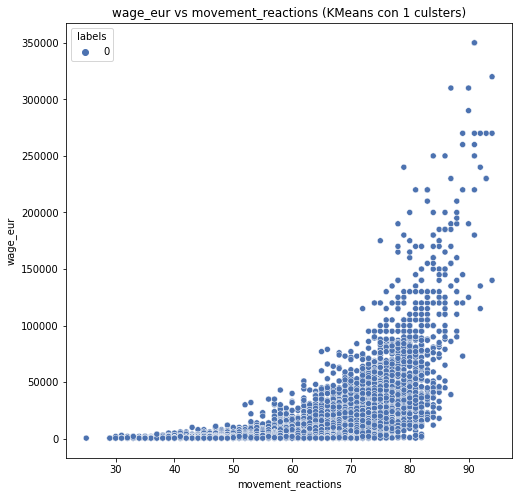

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


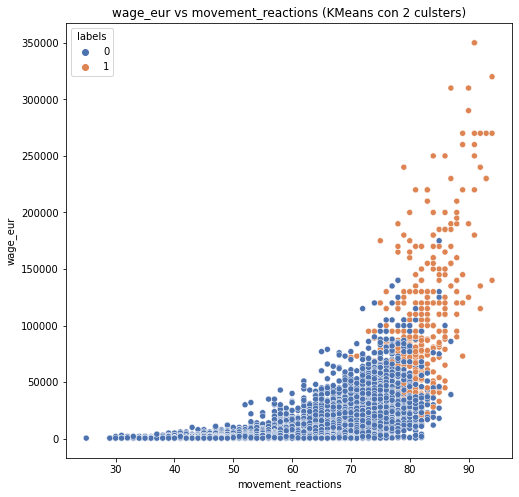

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


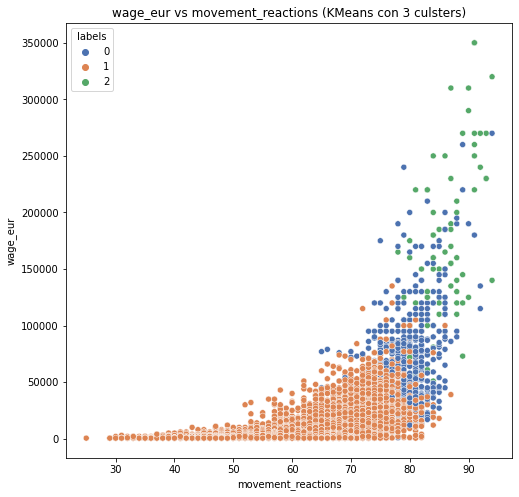

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


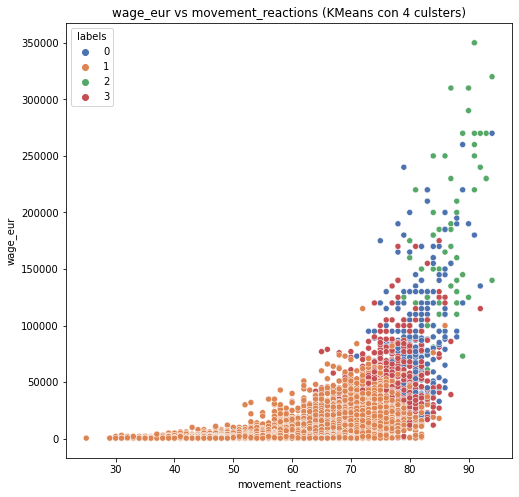

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


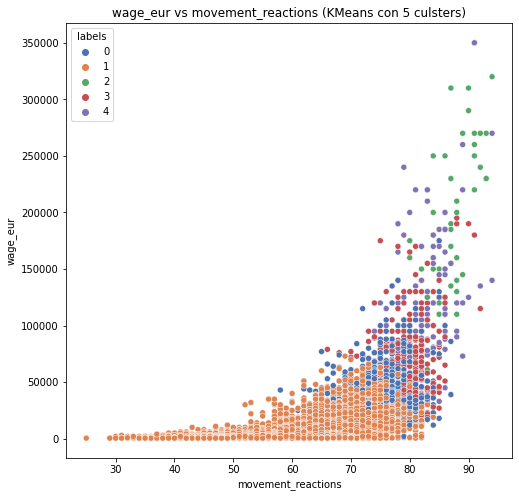

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


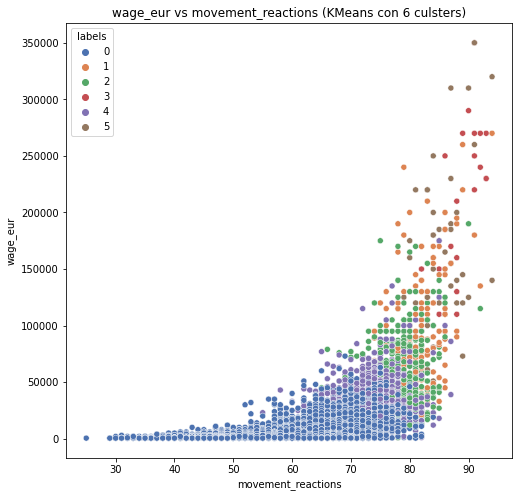

In [82]:
for i in range(6):
    kmeans_model=KMeans(n_clusters=i+1,random_state=1).fit_predict(good_columns)
    df['labels']=kmeans_model
    plt.figure(figsize=(8,8))
    sns.scatterplot(df.movement_reactions, df.wage_eur, hue=df.labels, palette='deep')
    plt.title(f'wage_eur vs movement_reactions (KMeans con {i+1} culsters)')
    plt.show()

### K-Means with 3 clusters

In [247]:
kmeans_model = KMeans(n_clusters=3, random_state=1)
#good_columns = df._get_numeric_data().drop(['nation_team_id'],axis=1)
kmeans_model.fit_predict(df_scale)
df['labels'] = kmeans_model.labels_
df['labels'].value_counts()

0    9049
2    7992
1    2124
Name: labels, dtype: int64

In [248]:
df.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'dob', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'league_level', 'club_position', 'club_loaned_from', 'club_joined',
       'nationality_name', 'nation_team_id', 'nation_position',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace', 'physic', 'attacking_crossing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_curve', 'skill_fk_accuracy',
       'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_sliding_ta

<AxesSubplot:xlabel='movement_reactions', ylabel='wage_eur'>

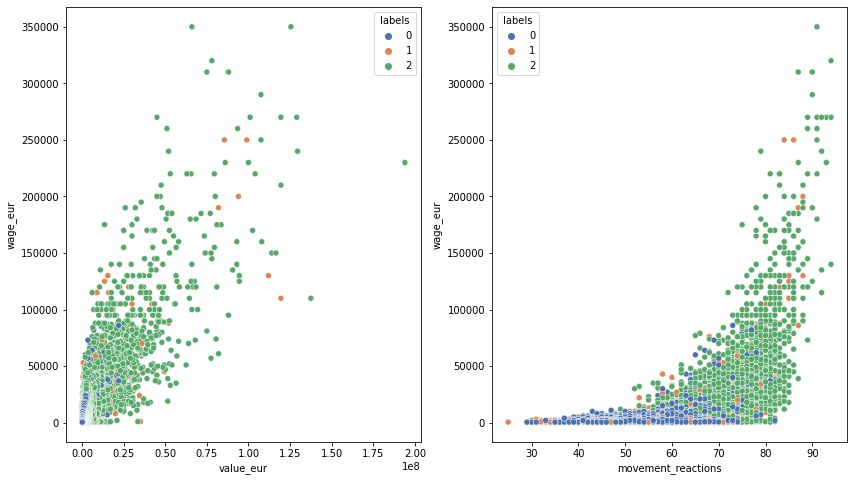

In [249]:
fig, axes = plt.subplots(1,2,figsize=(14,8))

sns.scatterplot(data=df, x='value_eur', y='wage_eur', hue='labels', ax=axes[0], palette='deep')
sns.scatterplot(data=df, x='movement_reactions', y='wage_eur', hue='labels', ax=axes[1], palette='deep')

In [ ]:
#**Cluster 2**:
#- Players from the top level leagues (English Premier League, Spain Primera Division, Italian Serie A, German 1. #Bundesliga,   French Ligue 1)
#- Players from the top clubs (Manchester City, FC Bayern München, Liverpool, Paris Saint-Germain,Real Madrid CF) 

In [250]:
display(df.groupby(df.labels).mean())

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_loaned_from,nation_team_id,...,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive,labels_DBSCAN
labels,,,,,,,,,,,,,,,,,,,,,
0,61.860758,69.163886,9.016604e+05,3176.356503,23.616422,181.685601,74.709029,1.448226,0.049840,22465.589744,...,45.256271,53.796331,50.523594,10.261355,52.963532,54.187092,15.391756,2.105094,2.120897,-1.0
1,64.395480,69.771657,1.930765e+06,6349.952919,26.185499,188.517420,81.677966,1.337100,0.038136,12005.021978,...,18.588041,40.889831,13.618173,62.696328,25.430320,25.078625,63.382298,2.000000,2.000000,-1.0
2,70.538038,73.597222,5.301406e+06,16350.243994,26.707207,178.921296,73.387638,1.252377,0.071321,12741.381853,...,58.538664,67.066441,49.237487,10.543794,67.341341,60.970345,16.754379,2.455455,2.083709,-1.0


In [223]:
#df[df['labels']==1]['league_name'].value_counts()

In [224]:
#df[df['labels']==1]['club_name'].value_counts()

In [225]:
#df[df['labels']==1]['league_level'].value_counts()

In [233]:
#df[df['labels']==2].iloc[:,:15].describe()

In [234]:
#df[df['labels']==2].iloc[:,15:32].describe()

In [235]:
#df[df['labels']==2].iloc[:,32:45].describe()

In [236]:
#df[df['labels']==2].iloc[:,45:57].describe()

In [237]:
#df[df['labels']==0].iloc[:,:15].describe()

In [238]:
#df[df['labels']==1].iloc[:,:15].describe()

In [251]:
df.groupby(df.labels).mean().iloc[:,:15]

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_loaned_from,nation_team_id,preferred_foot,weak_foot,skill_moves,international_reputation,pace
labels,,,,,,,,,,,,,,,
0,61.860758,69.163886,9.016604e+05,3176.356503,23.616422,181.685601,74.709029,1.448226,0.049840,22465.589744,0.759310,2.828379,2.161233,1.009062,65.009725
1,64.395480,69.771657,1.930765e+06,6349.952919,26.185499,188.517420,81.677966,1.337100,0.038136,12005.021978,0.890772,2.501883,1.000000,1.083804,0.000000
2,70.538038,73.597222,5.301406e+06,16350.243994,26.707207,178.921296,73.387638,1.252377,0.071321,12741.381853,0.732357,3.196446,2.927177,1.192442,71.887888


In [252]:
df.groupby(df.labels).mean().iloc[:,15:32]

,physic,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina
labels,,,,,,,,,,,,,,,,,
0,62.938667,46.442480,55.178915,57.394077,37.932810,41.794452,37.142447,50.459056,57.215383,64.704387,65.235717,60.983203,56.941983,62.884407,51.160239,64.777987,63.052824
1,0.000000,13.832392,13.907250,27.092750,11.199623,14.410546,13.816855,26.158663,19.166667,36.326271,36.618173,38.887947,57.996234,41.777307,46.431733,56.641714,29.361111
2,66.934434,62.590340,57.971847,68.956707,55.861987,62.163413,55.528403,63.150400,70.320821,72.168544,71.639139,72.923298,67.439690,71.353854,68.237613,67.034159,72.105731


In [253]:
df.groupby(df.labels).mean().iloc[:,32:48]

,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive,labels_DBSCAN
labels,,,,,,,,,,,,,,,,
0,65.206542,41.100122,56.552768,49.619405,46.807161,47.703503,45.256271,53.796331,50.523594,10.261355,52.963532,54.187092,15.391756,2.105094,2.120897,-1.0
1,59.741055,11.402072,25.560734,15.420433,10.079567,38.846516,18.588041,40.889831,13.618173,62.696328,25.430320,25.078625,63.382298,2.000000,2.000000,-1.0
2,66.134259,62.234234,62.302427,51.467217,64.983358,65.038163,58.538664,67.066441,49.237487,10.543794,67.341341,60.970345,16.754379,2.455455,2.083709,-1.0


In [239]:
#df[df['labels']==0]['league_name'].value_counts()

In [240]:
#df[df['labels']==0]['league_level'].value_counts()

In [241]:
#df[(df['labels']==1) & (df['league_level']==1)]['league_name'].value_counts()

In [242]:
#df[df['labels']==1]['league_level'].value_counts(normalize=True)

In [243]:
#df[df['labels']==0]['league_level'].value_counts(normalize=True)

In [244]:
#df[df['labels']==2]['league_level'].value_counts(normalize=True)

In [245]:
#df[df['labels']==2].groupby('league_name').overall.mean()

In [246]:
#df[(df['labels']==1) & (df['league_level']==1)].groupby('league_name').overall.mean()

In [254]:
df[df['labels']==2] 

,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_name,...,mentality_composure,defending_sliding_tackle,goalkeeping_handling,cam,cdm,gk,work_rate_attacking,work_rate_deffensive,labels,labels_DBSCAN
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,93,93,78000000.0,320000.0,34,1987-06-24,170,72,Paris Saint-Germain,...,96,24,11,93,64,19,2,1,2,-1
188545,R. Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,81,FC Bayern München,...,88,19,6,86,66,19,3,2,2,-1
20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985-02-05,187,83,Manchester United,...,95,24,11,86,59,20,3,1,2,-1
190871,Neymar Jr,91,91,129000000.0,270000.0,29,1992-02-05,175,68,Paris Saint-Germain,...,93,29,9,89,63,20,3,2,2,-1
192985,K. De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,70,Manchester City,...,89,53,13,89,80,21,3,3,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254321,A. Ilie,60,71,550000.0,800.0,21,2000-01-19,165,62,FC Voluntari,...,58,27,13,60,46,17,2,2,2,-1
255092,M. García,60,72,600000.0,2000.0,21,2000-01-17,155,66,Club Universidad Nacional,...,53,47,7,61,55,13,3,2,2,-1
256685,Hong Si Hoo,60,75,600000.0,850.0,20,2001-01-08,173,68,Seongnam FC,...,58,25,5,59,44,14,3,2,2,-1


In [258]:
df[df['labels']==2].club_position.value_counts(normalize=True)

SUB    0.408659
M      0.309810
D      0.123498
F      0.090966
RES    0.067067
Name: club_position, dtype: float64

In [259]:
df[df['labels']==1].club_position.value_counts(normalize=True)

SUB    0.442090
GK     0.330038
RES    0.227872
Name: club_position, dtype: float64

In [260]:
df[df['labels']==0].club_position.value_counts(normalize=True)

SUB    0.451873
RES    0.237043
D      0.205658
M      0.075588
F      0.029838
Name: club_position, dtype: float64

In [262]:
df[df['labels']==2].club_name.value_counts()#(normalize=True)

Paris Saint-Germain          28
FC Barcelona                 27
Real Betis Balompié          26
Real Madrid CF               25
RCD Espanyol de Barcelona    25
                             ..
SC Freiburg II                1
AC Mineros de Guayana         1
NorthEast United FC           1
SC East Bengal FC             1
Finn Harps                    1
Name: club_name, Length: 694, dtype: int64

In [263]:
df[df['labels']==1].club_name.value_counts()#(normalize=True)

Kawasaki Frontale              5
Newcastle United               5
Middlesbrough                  5
Spartak Moskva                 5
Kaizer Chiefs                  5
                              ..
IF Elfsborg                    2
Gallos Blancos de Querétaro    2
Raków Częstochowa              2
Stabæk Fotball                 2
Mumbai City FC                 2
Name: club_name, Length: 701, dtype: int64

In [264]:
df[df['labels']==0].club_name.value_counts()#(normalize=True)

Drogheda United            26
Varbergs BoIS FC           26
Sligo Rovers               25
Waterford FC               25
FC Viktoria 1889 Berlin    25
                           ..
Grêmio                      1
Juventus                    1
FC Porto                    1
Paris Saint-Germain         1
São Paulo                   1
Name: club_name, Length: 701, dtype: int64

In [268]:
df[df['labels']==2].nation_position.value_counts()

SUB    253
M      144
D       93
F       39
Name: nation_position, dtype: int64

In [269]:
df[df['labels']==1].nation_position.value_counts()

SUB    61
GK     30
Name: nation_position, dtype: int64

In [270]:
df[df['labels']==0].nation_position.value_counts()

SUB    47
D      29
F       2
Name: nation_position, dtype: int64

In [276]:
df[df['labels']==0].league_name.value_counts()

English League Two                      442
German 3. Bundesliga                    375
English League One                      361
USA Major League Soccer                 354
English League Championship             318
French Ligue 2                          312
Polish T-Mobile Ekstraklasa             298
Saudi Abdul L. Jameel League            288
Argentina Primera División              284
Chinese Super League                    280
Japanese J. League Division 1           266
Romanian Liga I                         255
Spanish Segunda División                244
German 2. Bundesliga                    241
Norwegian Eliteserien                   234
Swedish Allsvenskan                     233
Indian Super League                     216
Rep. Ireland Airtricity League          215
Mexican Liga MX                         201
Holland Eredivisie                      194
Belgian Jupiler Pro League              190
Danish Superliga                        186
Portuguese Liga ZON SAGRES      

In [275]:
df[df['labels']==0].league_name.value_counts()

English League Two                      442
German 3. Bundesliga                    375
English League One                      361
USA Major League Soccer                 354
English League Championship             318
French Ligue 2                          312
Polish T-Mobile Ekstraklasa             298
Saudi Abdul L. Jameel League            288
Argentina Primera División              284
Chinese Super League                    280
Japanese J. League Division 1           266
Romanian Liga I                         255
Spanish Segunda División                244
German 2. Bundesliga                    241
Norwegian Eliteserien                   234
Swedish Allsvenskan                     233
Indian Super League                     216
Rep. Ireland Airtricity League          215
Mexican Liga MX                         201
Holland Eredivisie                      194
Belgian Jupiler Pro League              190
Danish Superliga                        186
Portuguese Liga ZON SAGRES      